# Identification

Student names and matriculation numbers

Mariana Carvalho - a22001926
Gonçalo Matias - a22008333

We declare that the code and analyses contained in this notebook were produced by ourselves and therefore were not copied from elsewhere.

---
# Notes
---
When a code cell has the text `Your code here`, feel free to split it into more cells (code and/or markdown), if it is more convenient for you.


---
# Preprocessing
---

**TO-DO P1**

In [1]:
# Library imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objs as go

In [2]:
# Data imports

covid_df = pd.read_csv('covid-data.csv')
covid_df

,Unnamed: 0,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty_prc,cardiovasc_death_per_hundred_thousand,diabetes_pop_rate_aged_20_to_79,female_smokers_prc,female_smokers_prc.1,hospital_beds_per_thousand,life_expectancy
0,0,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
1,1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
2,2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
3,3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
4,4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220331,220331,Africa,Zimbabwe,2022-09-26,2.0,0.0,1.28,NaN,NaN,NaN,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49
220332,220332,Africa,Zimbabwe,2022-09-27,34.0,0.0,1.28,NaN,NaN,NaN,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49
220333,220333,Africa,Zimbabwe,2022-09-28,33.0,3.0,1.27,NaN,NaN,NaN,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49
220334,220334,Africa,Zimbabwe,2022-09-29,0.0,0.0,NaN,NaN,NaN,NaN,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220336 entries, 0 to 220335
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             220336 non-null  int64  
 1   continent                              207663 non-null  object 
 2   location                               220336 non-null  object 
 3   date                                   220336 non-null  object 
 4   new_cases                              211112 non-null  float64
 5   new_deaths                             192215 non-null  float64
 6   reproduction_rate                      166135 non-null  float64
 7   icu_patients                           28050 non-null   float64
 8   hosp_patients                          30819 non-null   float64
 9   weekly_icu_admissions                  7125 non-null    float64
 10  weekly_hosp_admissions_per_million     14188 non-null   

**TO-DO P2**

In [4]:
# Understanding the data

# FILL MARKDOWN CELL BELOW

* * * * * * * * * * * * * * * * * *
Your analysis documentation here

1   continent - Aqui estão todos os continentes

2   location - Aqui estão todos os países e continentes

3   date - A data

4   new_cases - O número de novos casos

5   new_deaths - O número de novos óbitos

6   reproduction_rate - É a taxa de reprodução

7   icu_patients - Pacientes que estão internados nos cuidados intensivos

8   hosp_patients - Pacientes que estão hospitalizados

9   weekly_icu_admissions - Novas entradas nos cuidados intensivos por semana

10  weekly_hosp_admissions_per_million - Novas entradas nos hospitais intensivos por milhão

11  new_tests - Novos testes

12  positive_rate - Taxa de casos positivos

13  total_vaccinations - Total de pessoas vacinadas

14  people_vaccinated_at_least_1_dose - Pessoas vacinadas com pelo menos uma dose

15  people_fully_vaccinated - Pessoas vacinadas com todas as doses

16  total_boosters - Total de vacinas dadas que são superiores à dose miníma

17  new_vaccinations - Vacinações novas

18  government_response_index - É a resposta do governo

19  population - População total

21  median_age - É a idade média da população

22  aged_65_older - Idosos com +65 anos

23  aged_70_older - Idosos com +70 anos

24  gdp_per_capita - É o produto interno bruto por pessoa

25  extreme_poverty_prc - Pobreza extrema por pessoa

26  cardiovasc_death_per_hundred_thousand - Óbitos por falha no sistema cardio vascular por milhar

27  diabetes_pop_rate_aged_20_to_79 - População entre os 20 e os 79 que sofram de diabetes

28  female_smokers_prc - Percentagem de mulheres que são fumadoras

29  female_smokers_prc.1 - Percentagem de homens que são fumadoras 

30  hospital_beds_per_thousand - Camas de hospital por milhar

31  life_expectancy - Expectativa média de vida
* * * * * * * * * * * * * * * * * *

**TO-DO P3**

In [5]:
# Ensure the date column is datetime

# Your code here
covid_df['date'] = pd.to_datetime(covid_df['date'])

---
# Analysis
---

**TO-DO A1**

Document what is happening in the `location` column

Todos os valores desta coluna não são do mesmo tipo , ou seja, são países ou continentes.

In [6]:
covid_df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

**TO-DO A2**

Valores de diferentes categorias, não serão úteis para a análise de dados, pois não nos permite tirar conclusões

**TO-DO A3**

In [7]:
# create dfx dataframe with data for Austria, France, Spain and Portugal only

# Your code here
country_df = covid_df.loc[(covid_df['location'] == 'Austria') | (covid_df['location'] == 'France') | (covid_df['location'] == 'Spain') | (covid_df['location'] == 'Portugal')] 
country_df

,Unnamed: 0,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty_prc,cardiovasc_death_per_hundred_thousand,diabetes_pop_rate_aged_20_to_79,female_smokers_prc,female_smokers_prc.1,hospital_beds_per_thousand,life_expectancy
12395,12395,Europe,Austria,2020-02-25,2.0,NaN,NaN,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12396,12396,Europe,Austria,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12397,12397,Europe,Austria,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12398,12398,Europe,Austria,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12399,12399,Europe,Austria,2020-02-29,2.0,NaN,NaN,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186962,186962,Europe,Spain,2022-09-26,0.0,0.0,1.28,143.0,2132.0,112.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
186963,186963,Europe,Spain,2022-09-27,8761.0,75.0,1.28,127.0,2107.0,116.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
186964,186964,Europe,Spain,2022-09-28,0.0,0.0,1.28,133.0,2097.0,113.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
186965,186965,Europe,Spain,2022-09-29,0.0,0.0,NaN,144.0,2150.0,119.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56


**TO-DO A4**

In [8]:
# create function to produce and export histogram and boxplot.

# follow the instructions provided in the handout
# remember you will revise/expand this function later

# Your code here                        
def get_basic_plots(country, var, opt): 
    
    country_time = (covid_df['date'] >= '2020-02-24') & (covid_df['date'] >= '2020-08-24')
    country2_df = country_df.loc[(covid_df['location'] == country)] 
    
    
    if opt == False:    
        country2_df = country2_df.loc[country_time]
        res = sns.histplot(data = country2_df[var], kde = True)
        plt.subplots()
        res = sns.boxplot(country2_df[var])
        q1 = country2_df[var].quantile(.25)
        q2 = country2_df[var].quantile(.50)
        q3 = country2_df[var].quantile(.75)
        iqr = q3 - q1
        print(q1, q2, q3, iqr) 
    if opt == True:
        remove = remove_outliers(country2_df, var)
        res = sns.histplot(data = remove[var], kde = True)
        plt.subplots()
        res = sns.boxplot(remove[var])
        q1 = country2_df[var].quantile(.25)
        q2 = country2_df[var].quantile(.50)
        q3 = country2_df[var].quantile(.75)
        iqr = q3 - q1
        print(q1, q2, q3, iqr) 
                

**TO-DO A5**

In [9]:
# create function to remove outliers using the 1.5*IQR method 

# Your code here
def remove_outliers(df,col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    a = iqr * 1.5 
    minE = q1 - a
    minD = q3 + a
    datatemp_df = df.loc[(df[col] >= minE) & (df[col] <= minD)] 
    datatemp_df.shape
    return datatemp_df

**TO-DO A6**

In [10]:
# edit function created in A4 so that the argument opt is used to remove outliers (or not)
# following instructions in the handout. Edit your code in the TO-DO A4 cell

**TO-DO A7**

676.0 2592.5 7236.5 6560.5


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


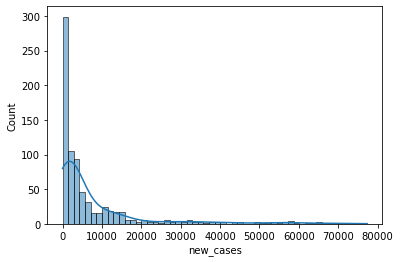

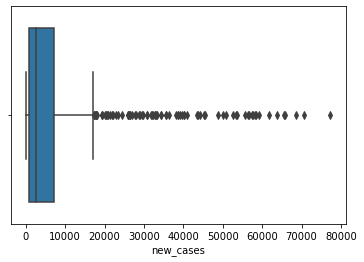

In [11]:
get_basic_plots('Portugal', 'new_cases', False)

406.5 1401.0 5256.0 4849.5


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


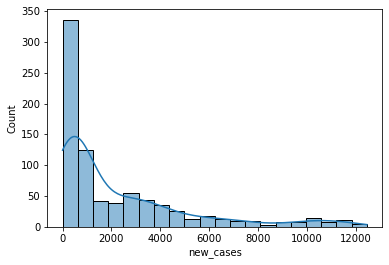

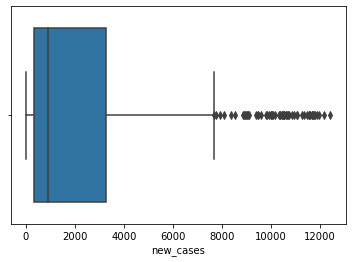

In [12]:
get_basic_plots('Portugal', 'new_cases', True)

4.0 11.0 33.0 29.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


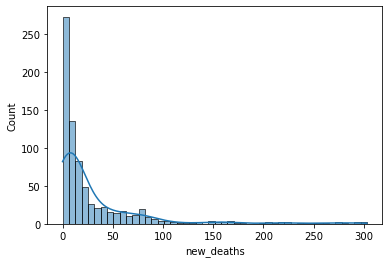

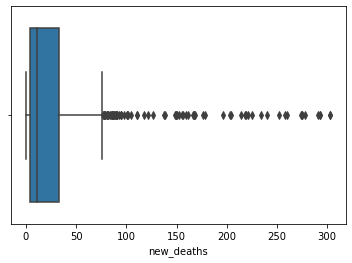

In [13]:
get_basic_plots('Portugal', 'new_deaths', False)

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.75 10.0 28.0 24.25


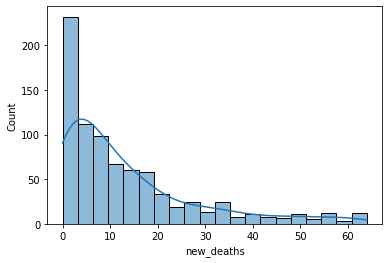

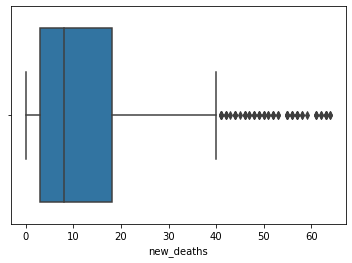

In [14]:
get_basic_plots('Portugal', 'new_deaths', True)

1091.0 2506.0 7232.0 6141.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


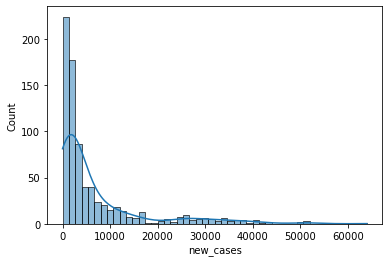

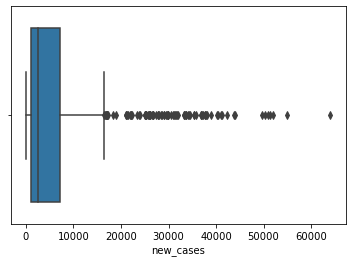

In [15]:
get_basic_plots('Austria', 'new_cases', False)

285.0 1801.0 5445.5 5160.5


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


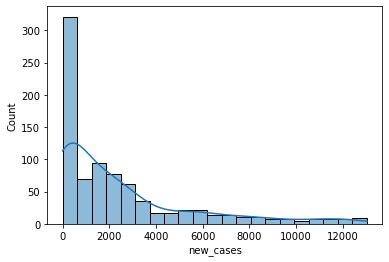

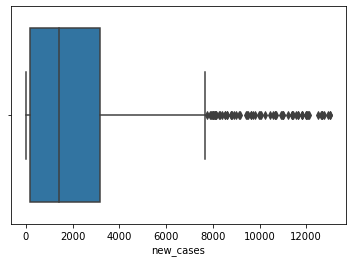

In [16]:
get_basic_plots('Austria', 'new_cases', True)

5.0 15.0 35.0 30.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


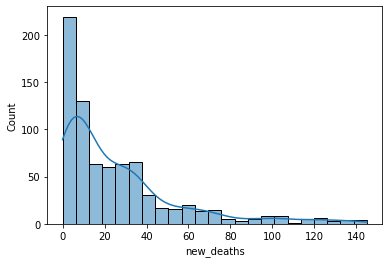

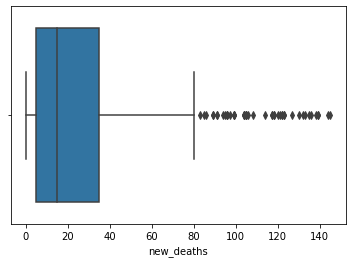

In [17]:
get_basic_plots('Austria', 'new_deaths', False)

3.0 12.0 31.0 28.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


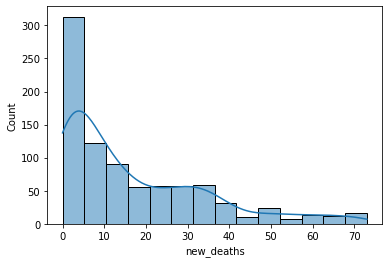

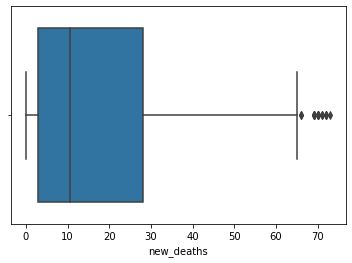

In [18]:
get_basic_plots('Austria', 'new_deaths', True)

7295.25 21347.5 46045.5 38750.25


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


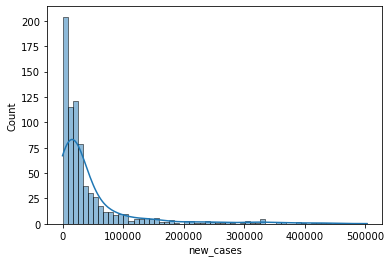

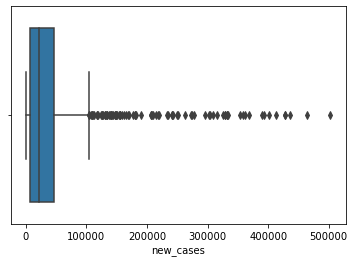

In [19]:
get_basic_plots('France', 'new_cases', False)

2382.0 13483.0 34921.0 32539.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


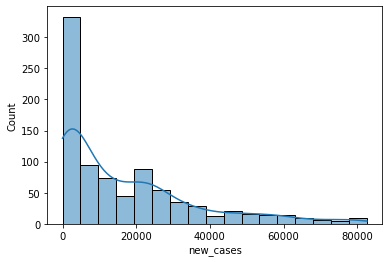

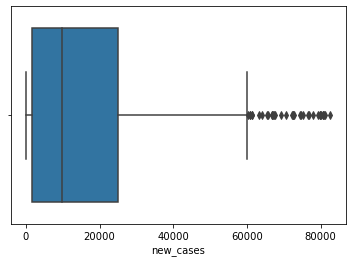

In [28]:
get_basic_plots('France', 'new_cases', True)

43.0 107.0 213.0 170.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


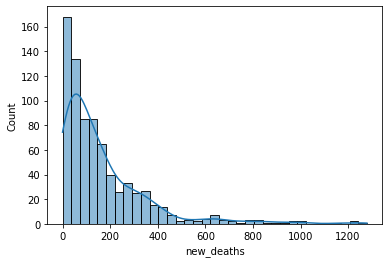

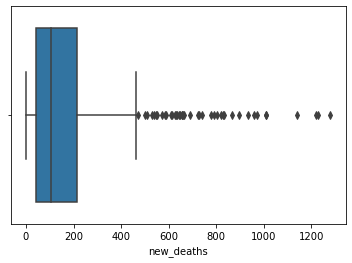

In [21]:
get_basic_plots('France', 'new_deaths', False)

31.0 89.5 213.25 182.25


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


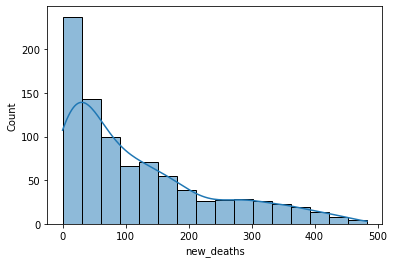

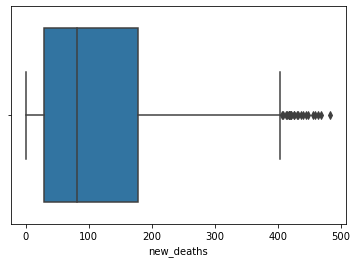

In [22]:
get_basic_plots('France', 'new_deaths', True)

0.0 4984.0 18047.0 18047.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


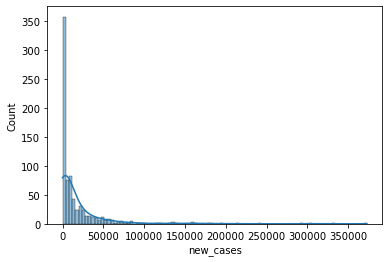

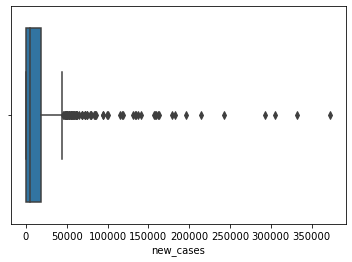

In [23]:
get_basic_plots('Spain', 'new_cases', False)

0.0 2421.0 12239.0 12239.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


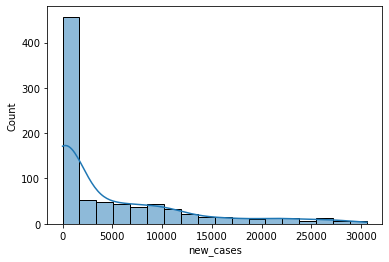

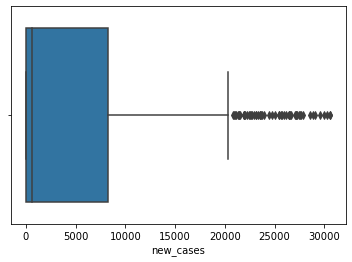

In [24]:
get_basic_plots('Spain', 'new_cases', True)

0.0 37.0 168.0 168.0


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


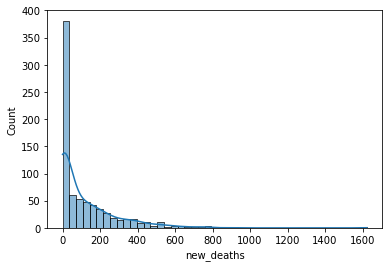

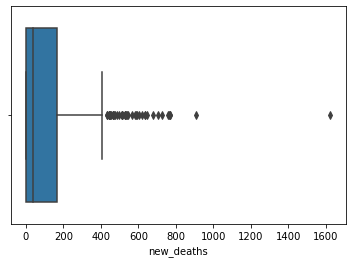

In [25]:
get_basic_plots('Spain', 'new_deaths', False)

0.0 30.0 178.5 178.5


C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


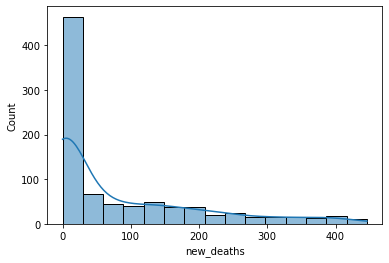

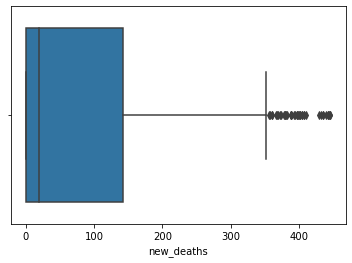

In [26]:
get_basic_plots('Spain', 'new_deaths', True)

Your analysis here 

a) Tendo em conta a análise de todos os gráficos, de diferentes países com diferentes variáveis, podemos concluir que alguns gráficos têm distribuição normal enquanto outros não. Portugal, com a variável "new_cases" apresenta uma distribuição normal, assim como, Portugal - "new_deaths", Áustria - "new_cases". O resto dos países com ambas as variáveis não apresenta uma distribuição normal 

b) Analiticamente, é possivel observar diferenças entre os resultados. Os valores outliers retirados não nos trasmitem qualquer tipo de informação relevante. E com isso, permite que o boxplot fique mais clean para o seu estudo. 
   Quando se analisa a diferença entre os valores com outliers e sem, podemos verificar que, sempre que os valor de mediana são próximos, não é prórpriamente necessário retirar os outliers, não vai alterar muito.

**TO-DO A8**

In [27]:
# adding extra columns to the dataframe with normalised data for new_cases and new_deaths

# Your code here

casos_ht = [] 
mortes_ht = [] 

for i in range (len(country_df.index)):
    if country_df['location'][i] == 'Portugal':
        casos_ht.append((country_df['new_cases'][i] / country_df['population'][i] )*100000)
        mortes_ht.append((country_df['new_deaths'][i] / country_df['population'][i])*100000)

country_df['new_cases_ht'] = casos_ht
country_df['new_deaths_ht'] = mortes_ht

KeyError: 0

Your analysis here